In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
inspector = inspect(engine)

In [11]:
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [13]:
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
date = dt.datetime(2016, 8, 23)

results = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= date).\
    group_by(Measurement.date).\
    order_by(Measurement.date).all()
results

[('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06', 0.0),
 ('2016-10-07'

In [15]:
# Calculate the date 1 year ago from the last data point in the database
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Query Date (One Year Before Last Data Point): ", query_date)

Query Date (One Year Before Last Data Point):  2016-08-23


In [16]:
# Perform a query to retrieve the data and precipitation scores
#results = session.query(Measurement.date, Measurement.prcp).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date

df = pd.DataFrame(results, columns=['date', 'prcp'])
df.set_index('date', inplace=True, )
df.head(10)

,prcp
date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01
2016-08-29,0.00
2016-08-30,0.00
2016-08-31,0.13
2016-09-01,0.00


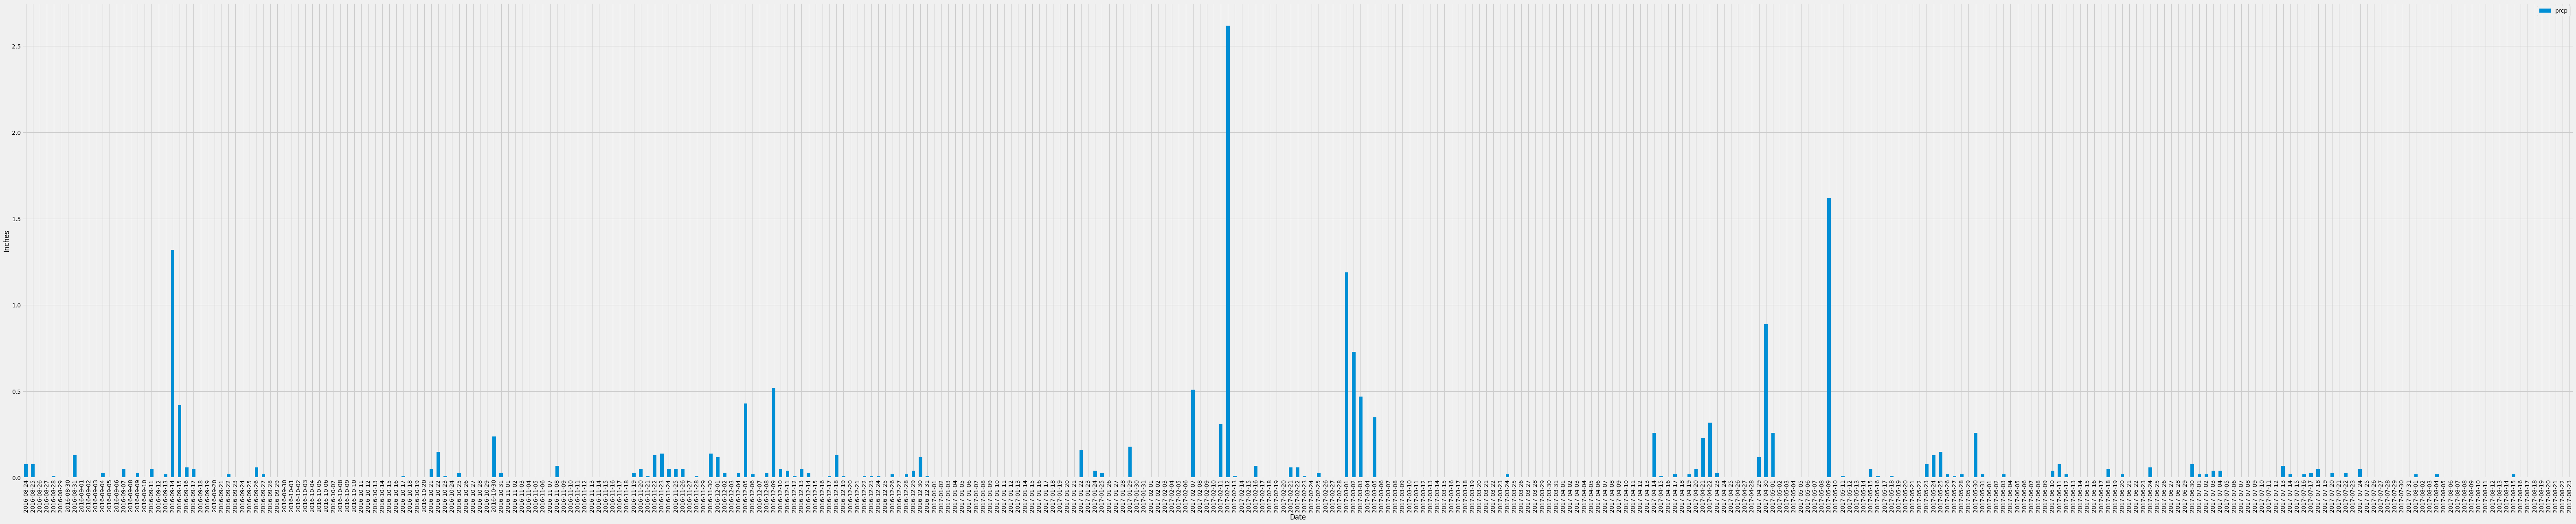

In [17]:
# Use Pandas Plotting with Matplotlib to plot the data

df.plot(kind="bar", figsize=(100,20))
plt.title=("Climate Data")
plt.xlabel("Date")
plt.ylabel("Inches")
plt.show()


In [18]:
# Use Pandas to calculate the summary statistics for the precipitation data
df["prcp"].describe()

count    363.000000
mean       0.048843
std        0.205197
min        0.000000
25%        0.000000
50%        0.000000
75%        0.020000
max        2.620000
Name: prcp, dtype: float64

In [19]:
# Design a query to show how many stations are available in this dataset?
session.query(Measurement.station).distinct().count()

9

In [30]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.tobs)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.tobs).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [34]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
lowest = session.query(Measurement.station, func.min(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()
print(lowest)

highest = session.query(Measurement.station, func.max(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()
print(highest)

avgTemp = session.query(Measurement.station, func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()
print(avgTemp)

[('USC00519281', 54.0)]
[('USC00519281', 85.0)]
[('USC00519281', 71.66378066378067)]


In [37]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


dateStation = dt.datetime(2016, 8, 23)

tempResults = session.query(Measurement.date, Measurement.station, Measurement.tobs).\
    filter(Measurement.date >= dateStation).\
    filter(Measurement.station == 'USC00519281').\
    group_by(Measurement.date).\
    order_by(Measurement.date).all()
tempResults

[('2016-08-24', 'USC00519281', 77.0),
 ('2016-08-25', 'USC00519281', 80.0),
 ('2016-08-26', 'USC00519281', 80.0),
 ('2016-08-27', 'USC00519281', 75.0),
 ('2016-08-28', 'USC00519281', 73.0),
 ('2016-08-29', 'USC00519281', 78.0),
 ('2016-08-30', 'USC00519281', 77.0),
 ('2016-08-31', 'USC00519281', 78.0),
 ('2016-09-01', 'USC00519281', 80.0),
 ('2016-09-02', 'USC00519281', 80.0),
 ('2016-09-03', 'USC00519281', 78.0),
 ('2016-09-04', 'USC00519281', 78.0),
 ('2016-09-05', 'USC00519281', 78.0),
 ('2016-09-06', 'USC00519281', 73.0),
 ('2016-09-07', 'USC00519281', 74.0),
 ('2016-09-08', 'USC00519281', 80.0),
 ('2016-09-09', 'USC00519281', 79.0),
 ('2016-09-10', 'USC00519281', 77.0),
 ('2016-09-11', 'USC00519281', 80.0),
 ('2016-09-12', 'USC00519281', 76.0),
 ('2016-09-13', 'USC00519281', 79.0),
 ('2016-09-14', 'USC00519281', 75.0),
 ('2016-09-15', 'USC00519281', 79.0),
 ('2016-09-16', 'USC00519281', 78.0),
 ('2016-09-17', 'USC00519281', 79.0),
 ('2016-09-18', 'USC00519281', 78.0),
 ('2016-09-1

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
